# SMPT: Experimental Results

In this notebook, we report on some experimental results obtained with SMPT, our prototype implementation of an SMT-based model-checker with reduction equations.

### Setup Analysis

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
path_data = 'data/merged/'

## Load Data

Data frame corresponding to the reduction data.

In [3]:
# Read 'reduction.csv'
df_reduction = pd.read_csv(path_data + 'reduction.csv')
df_reduction

,MODEL,TIME,RATIO,ANALYSIS
0,AirplaneLD-PT-0010,0.219477,88,True
1,AirplaneLD-PT-0020,0.037250,93,True
2,AirplaneLD-PT-0050,0.066531,97,True
3,AirplaneLD-PT-0100,0.112506,98,True
4,AirplaneLD-PT-0200,0.311331,99,True
5,AirplaneLD-PT-0500,1.579511,99,True


Data frame corresponding to the ReachabilityCardinality properties.

In [4]:
# Read 'ReachabilityCardinality.csv'
df_RC = pd.read_csv(path_data + 'RC.csv')
df_RC

,MODEL,PROPERTY,MONOTONE,TIME_WITH_REDUCTION,METHOD_WITH_REDUCTION,CORRECTNESS_WITH_REDUCTION,TIME_WITHOUT_REDUCTION,METHOD_WITHOUT_REDUCTION,CORRECTNESS_WITHOUT_REDUCTION
0,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-00,False,NaN,None,None,NaN,None,None
1,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-01,False,NaN,None,None,NaN,None,None
2,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-02,False,NaN,None,None,NaN,None,None
3,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-03,True,1.317632,IC3,True,NaN,None,None
4,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-04,True,6.905457,IC3,True,NaN,None,None
...,...,...,...,...,...,...,...,...,...
91,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityCardinality-11,False,NaN,None,None,NaN,None,None
92,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityCardinality-12,True,13.048807,IC3,True,NaN,None,None
93,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityCardinality-13,False,NaN,None,None,NaN,None,None
94,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityCardinality-14,False,NaN,None,None,NaN,None,None


Data frame corresponding to the ReachabilityFireability properties.

In [5]:
# Read 'ReachabilityFireability.csv'
df_RF = pd.read_csv(path_data + 'RF.csv')
df_RF

,MODEL,PROPERTY,MONOTONE,TIME_WITH_REDUCTION,METHOD_WITH_REDUCTION,CORRECTNESS_WITH_REDUCTION,TIME_WITHOUT_REDUCTION,METHOD_WITHOUT_REDUCTION,CORRECTNESS_WITHOUT_REDUCTION
0,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityFireability-00,True,0.026019,BMC,True,15.349598,BMC,True
1,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityFireability-01,False,0.017523,BMC,True,3.111217,BMC,True
2,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityFireability-02,False,NaN,None,None,NaN,None,None
3,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityFireability-03,False,0.014600,BMC,True,0.170743,BMC,True
4,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityFireability-04,True,0.030978,BMC,True,0.539939,BMC,True
...,...,...,...,...,...,...,...,...,...
82,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityFireability-02,True,7.334224,BMC,True,NaN,None,None
83,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityFireability-03,False,0.976014,BMC,True,NaN,None,None
84,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityFireability-04,True,2.710290,BMC,True,NaN,None,None
85,AirplaneLD-PT-0500,AirplaneLD-PT-0500-ReachabilityFireability-05,False,NaN,None,None,NaN,None,None


Data frame corresponding to the ReachabilityDeadlock properties.

In [6]:
# Read 'ReachabilityDeadlock.csv'
df_RD = pd.read_csv(path_data + 'RD.csv')
df_RD

,MODEL,PROPERTY,MONOTONE,TIME_WITH_REDUCTION,METHOD_WITH_REDUCTION,CORRECTNESS_WITH_REDUCTION,TIME_WITHOUT_REDUCTION,METHOD_WITHOUT_REDUCTION,CORRECTNESS_WITHOUT_REDUCTION
0,AirplaneLD-PT-0010,ReachabilityDeadlock,False,0.021472,BMC,True,1.778207,BMC,True
1,AirplaneLD-PT-0020,ReachabilityDeadlock,False,0.032518,BMC,True,2.765876,BMC,True
2,AirplaneLD-PT-0050,ReachabilityDeadlock,False,0.059696,BMC,True,10.599967,BMC,True
3,AirplaneLD-PT-0100,ReachabilityDeadlock,False,0.121515,BMC,True,33.059684,BMC,True
4,AirplaneLD-PT-0200,ReachabilityDeadlock,False,0.303116,BMC,True,NaN,None,None


Concatenate properties data frames into one. 

In [7]:
# Concatenate 'ReachabilityCardinality', ''ReachabilityFireability' and 'ReachabilityDeadlock' 
df_properties = pd.concat([df_RC, df_RF, df_RD])

# Convert correctness to str
df_properties = df_properties.astype({'CORRECTNESS_WITH_REDUCTION': 'str', 'CORRECTNESS_WITHOUT_REDUCTION': 'str'})

df_properties

,MODEL,PROPERTY,MONOTONE,TIME_WITH_REDUCTION,METHOD_WITH_REDUCTION,CORRECTNESS_WITH_REDUCTION,TIME_WITHOUT_REDUCTION,METHOD_WITHOUT_REDUCTION,CORRECTNESS_WITHOUT_REDUCTION
0,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-00,False,NaN,None,None,NaN,None,None
1,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-01,False,NaN,None,None,NaN,None,None
2,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-02,False,NaN,None,None,NaN,None,None
3,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-03,True,1.317632,IC3,True,NaN,None,None
4,AirplaneLD-PT-0010,AirplaneLD-PT-0010-ReachabilityCardinality-04,True,6.905457,IC3,True,NaN,None,None
...,...,...,...,...,...,...,...,...,...
0,AirplaneLD-PT-0010,ReachabilityDeadlock,False,0.021472,BMC,True,1.778207,BMC,True
1,AirplaneLD-PT-0020,ReachabilityDeadlock,False,0.032518,BMC,True,2.765876,BMC,True
2,AirplaneLD-PT-0050,ReachabilityDeadlock,False,0.059696,BMC,True,10.599967,BMC,True
3,AirplaneLD-PT-0100,ReachabilityDeadlock,False,0.121515,BMC,True,33.059684,BMC,True


## Tool Confidence rate

### Reliability

Reliability with reduction:

In [8]:
reliability_with_reduction = df_properties.query('CORRECTNESS_WITH_REDUCTION == "False"').shape[0] / df_properties.shape[0] * 100
reliability_with_reduction

0.0

Reliability without reduction:

In [9]:
reliability_without_reduction = df_properties.query('CORRECTNESS_WITHOUT_REDUCTION == "False"').shape[0] / df_properties.shape[0] * 100
reliability_without_reduction

0.0

### Correct Values

Correct values with reduction:

In [10]:
correct_values_with_reduction = df_properties.query('CORRECTNESS_WITH_REDUCTION == "True"').shape[0]
correct_values_with_reduction

106

Correct values without reduction:

In [11]:
correct_values_without_reduction = df_properties.query('CORRECTNESS_WITHOUT_REDUCTION == "True"').shape[0]
correct_values_without_reduction

75

### Summary Table

In [12]:
summary = {'Reliability': [reliability_with_reduction, reliability_without_reduction], 'Correct Values': [correct_values_with_reduction, correct_values_without_reduction]}
pd.DataFrame(data=summary, index=['With reduction', 'Without reduction'])

,Reliability,Correct Values
With reduction,0.0,106
Without reduction,0.0,75


## Analysis

Analysis of the approach.

### Reduction Ratio 

Reduction ratio among analyzed Petri nets.

In [13]:
# Count nets with same reduction ratio
ratio_frequency = df_reduction['RATIO'].value_counts().sort_index(ascending=False)

# Cumulative data frame
df_ratio_frequency = pd.DataFrame({'MODELS': ratio_frequency.values}).cumsum()
df_ratio_frequency['RATIO'] = ratio_frequency.index
df_ratio_frequency

,MODELS,RATIO
0,2,99
1,3,98
2,4,97
3,5,93
4,6,88


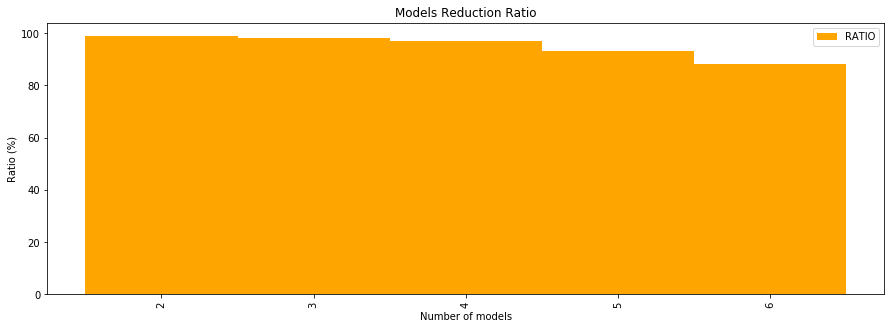

In [14]:
# Draw Models Reduction Ratio
df_ratio_frequency.plot(x='MODELS', y='RATIO', kind='bar', width=1.0, color='orange', figsize=(15,5))
plt.xlabel('Number of models')
plt.ylabel('Ratio (%)')
plt.title("Models Reduction Ratio")
plt.show()

### Time to Process Properties

Comparaison of the time to process properties between with and without Petri nets reduction.

In [15]:
def df_reduction_filter(reduction):
    """ Reduction data frame filter.
    """
    df = df_properties[['TIME_{}_REDUCTION'.format(reduction)]].query('TIME_{}_REDUCTION == TIME_{}_REDUCTION'.format(reduction, reduction)).sort_values('TIME_{}_REDUCTION'.format(reduction)).reset_index(drop=True).cumsum()
    df['COUNTER'] = np.arange(1, len(df) + 1)
    return df

In [16]:
# Data frame of execution time with reduction
df_time_with_reduction = df_reduction_filter('WITH')
df_time_with_reduction

,TIME_WITH_REDUCTION,COUNTER
0,0.013375,1
1,0.027974,2
2,0.043295,3
3,0.060818,4
4,0.082289,5
...,...,...
101,78.223309,102
102,94.462003,103
103,115.988528,104
104,146.822455,105


In [17]:
# Data frame of execution time without reduction
df_time_without_reduction = df_reduction_filter('WITHOUT')
df_time_without_reduction

,TIME_WITHOUT_REDUCTION,COUNTER
0,0.170743,1
1,0.362093,2
2,0.601583,3
3,0.881062,4
4,1.241915,5
...,...,...
70,989.699641,71
71,1070.321518,72
72,1168.691917,73
73,1281.404215,74


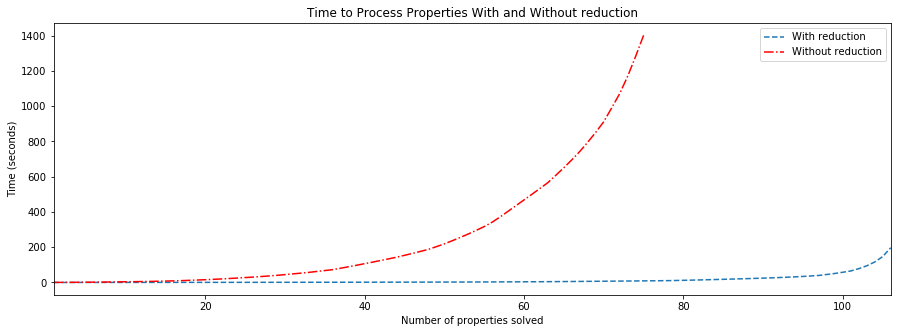

In [18]:
# Draw time to process properties with and without Petri nets reduction.
ax = plt.gca()
df_time_with_reduction.plot(kind='line', x='COUNTER', y='TIME_WITH_REDUCTION', label='With reduction', linestyle='--', ax=ax)
df_time_without_reduction.plot(kind='line', x='COUNTER', y='TIME_WITHOUT_REDUCTION', label='Without reduction', linestyle='-.', color='red', ax=ax, figsize=(15,5))
plt.xlabel('Number of properties solved')
plt.ylabel('Time (seconds)')
plt.title("Time to Process Properties With and Without reduction")
plt.show()

### Performance Comparaison Between BMC and IC3

Comparaison of the time to process properties between BMC and IC3 methods.

In [19]:
def df_method_filter(method):
    """ Method data frame filter.
    """
    df_with_reduction = df_properties.query('METHOD_WITH_REDUCTION == "{}"'.format(method)).rename(columns={"TIME_WITH_REDUCTION": "TIME"})
    df_without_reduction = df_properties.query('METHOD_WITHOUT_REDUCTION == "{}"'.format(method)).rename(columns={"TIME_WITHOUT_REDUCTION": "TIME"})
    df = pd.concat([df_with_reduction, df_without_reduction], sort=True)
    df = df[['TIME']].sort_values('TIME').reset_index(drop=True).cumsum()
    df['COUNTER'] = np.arange(1, len(df) + 1)
    return df

In [20]:
# Data frame of BMC execution time
df_time_bmc = df_method_filter('BMC')
df_time_bmc

,TIME,COUNTER
0,0.013375,1
1,0.027974,2
2,0.043295,3
3,0.060818,4
4,0.082289,5
...,...,...
137,605.503067,138
138,683.988765,139
139,782.359164,140
140,895.071462,141


In [21]:
# Data frame of IC3 execution time
df_time_ic3 = df_method_filter('IC3')
df_time_ic3

,TIME,COUNTER
0,0.059482,1
1,0.137842,2
2,0.347375,3
3,0.568012,4
4,0.847491,5
5,1.149220,6
6,1.497162,7
7,1.908885,8
8,2.345509,9
9,2.785399,10


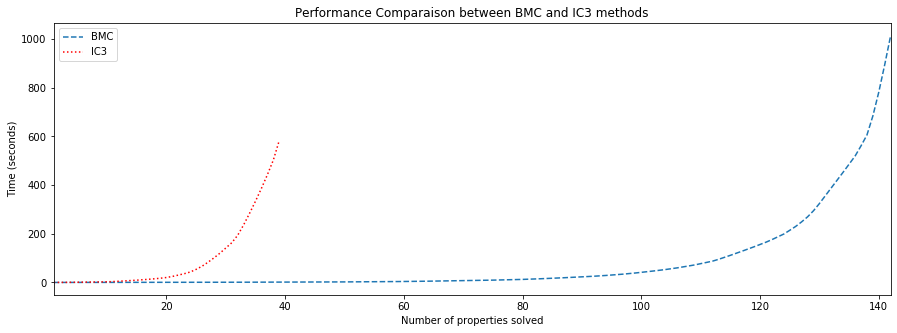

In [22]:
# Draw time to process properties with BMC and IC3 methods
ax = plt.gca()
df_time_bmc.plot(kind='line', x='COUNTER', y='TIME', label='BMC', linestyle='--', ax=ax)
df_time_ic3.plot(kind='line', x='COUNTER', y='TIME', label='IC3', linestyle=':', color='red', ax=ax, figsize=(15,5))
plt.xlabel('Number of properties solved')
plt.ylabel('Time (seconds)')
plt.title("Performance Comparaison between BMC and IC3 methods")
plt.show()